In [1]:
import pandas as pd
import numpy as np
from decimal import *

order1 = pd.read_csv('F:/泰迪/outfile.csv', encoding='gbk')
order1['支付时间'] = pd.to_datetime(order1['支付时间'])
order1 = pd.DataFrame(order1)
#先把饮料类分开并提取出来
order1 = order1.groupby('大类')  
order2 = order1.get_group('饮料')
order3 = order1.get_group('非饮料')


In [2]:
#饮料类

order4 = order2[['商品','地点','实际金额','支付时间']].groupby('地点')
A = order4.get_group('A')  #A
B = order4.get_group('B')  #B
C = order4.get_group('C')  #C
D = order4.get_group('D')  #D
E = order4.get_group('E')  #E


#非饮料类
order5 = order3[['商品','地点','实际金额','支付时间']].groupby('地点')
A1 = order5.get_group('A')  #A
B1 = order5.get_group('B')  #B
C1 = order5.get_group('C')  #C
D1 = order5.get_group('D')  #D
E1 = order5.get_group('E')  #E

In [3]:
A = A.groupby([ A['支付时间'].dt.month.rename('month'),A['支付时间'].dt.day.rename('day')])
B = B.groupby([ B['支付时间'].dt.month.rename('month'),B['支付时间'].dt.day.rename('day')])
C = C.groupby([ C['支付时间'].dt.month.rename('month'),C['支付时间'].dt.day.rename('day')])
D = D.groupby([ D['支付时间'].dt.month.rename('month'),D['支付时间'].dt.day.rename('day')])
E = E.groupby([ E['支付时间'].dt.month.rename('month'),E['支付时间'].dt.day.rename('day')])

A1 = A1.groupby([ A1['支付时间'].dt.month.rename('month'),A1['支付时间'].dt.day.rename('day')])
B1 = B1.groupby([ B1['支付时间'].dt.month.rename('month'),B1['支付时间'].dt.day.rename('day')])
C1 = C1.groupby([ C1['支付时间'].dt.month.rename('month'),C1['支付时间'].dt.day.rename('day')])
D1 = D1.groupby([ D1['支付时间'].dt.month.rename('month'),D1['支付时间'].dt.day.rename('day')])
E1 = E1.groupby([ E1['支付时间'].dt.month.rename('month'),E1['支付时间'].dt.day.rename('day')])

In [4]:
A = A.agg({'实际金额':np.sum})
B = B.agg({'实际金额':np.sum})
C = C.agg({'实际金额':np.sum})
D = D.agg({'实际金额':np.sum})
E = E.agg({'实际金额':np.sum})

A1 = A1.agg({'实际金额':np.sum})
B1 = B1.agg({'实际金额':np.sum})
C1 = C1.agg({'实际金额':np.sum})
D1 = D1.agg({'实际金额':np.sum})
E1 = E1.agg({'实际金额':np.sum})



In [5]:
A

实际金额
month day       
1     1      9.5
      2     18.0
      3     19.0
      4     12.0
      5      8.5
      6      3.5
      7      3.5
      8     64.0
      9    173.5
      10   152.0
      11    25.5
      15     4.5
      16    29.0
      22     4.0
      23     3.0
      25     7.0
      26     6.5
      27     7.0
      30   124.3
      31    43.0
2     1     12.5
      2     40.5
      3      3.0
      4     13.5
      5     34.5
      7     17.0
      8      8.0
      9     12.0
      10     5.5
      12     2.0
...          ...
12    2    160.0
      3    154.5
      4    223.5
      5    322.3
      6    116.5
      7    140.3
      8    147.3
      9    248.5
      10   158.0
      11   174.1
      12   274.3
      13   149.0
      14   240.5
      15   129.0
      16   224.5
      17   106.0
      18   189.5
      19   134.0
      20    70.0
      21    59.0
      22    64.5
      23   144.0
      24   122.0
      25   102.3
      26   119.5
      27   101.5
      28    64.5
      29    19.6
      30    54.0
      31    51.0

[316 rows x 1 columns]

In [6]:
#from sklearn.preprocessing import Imputer

#my_imputer = Imputer()
#data_imputed = my_imputer.fit_transform(A)
#print (data_imputed)

#A['实际金额'] = data_imputed

In [7]:
import matplotlib.pyplot as plt

A['实际金额'].plot()

plt.show()

#A['实际金额'] = 

<Figure size 640x480 with 1 Axes>

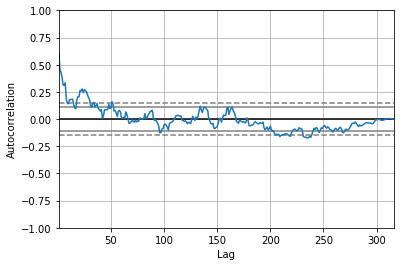

In [8]:
#下面的示例绘制了时间序列中大量滞后的自相关。

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(A)

plt.show()

D:\a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\a\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.实际金额   No. Observations:                  315
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1691.596
Method:                       css-mle   S.D. of innovations             51.962
Date:                Thu, 29 Aug 2019   AIC                           3397.191
Time:                        17:11:26   BIC                           3423.459
Sample:                             1   HQIC                          3407.686
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1350      1.271      0.106      0.915      -2.356       2.626
ar.L1.D.实际金额    -0.4347      0.056     -7.800      0.000      -0.544      -0.325
ar.L2.D.实际金额    -0.3826      0.060     -6.33

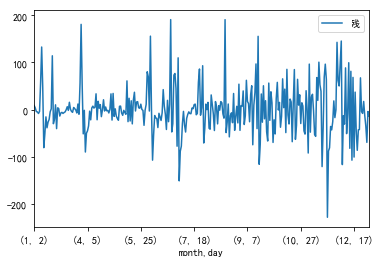

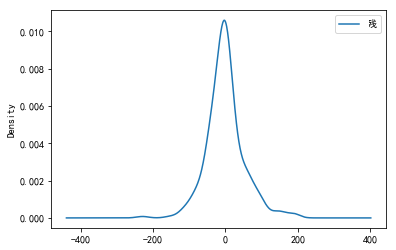

                0
count  315.000000
mean     0.011140
std     52.045244
min   -229.204513
25%    -27.204480
50%     -3.133264
75%     17.336260
max    191.231482


In [9]:
"""
将ARIMA模型与整个Shampoo Sales数据集相匹配，并检查残差。

首先，我们适合ARIMA（5,1,0）模型。这将自动回归的滞后值设置为5，使用差值顺序1使时间序列静止，并使用0的移动平均模型。

在拟合模型时，提供了大量关于线性回归模型拟合的调试信息。我们可以通过将disp参数设置为0 来关闭它。
"""

from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from pandas import DataFrame
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
# fit model

model = ARIMA(A, order=(5,1,0))

model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors残差的线图

residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.legend('残差')
plt.show()


#残余误差值的密度图，表明误差是高斯的，但可能不是以零为中心。

residuals.plot(kind='kde')
plt.legend('残差密度')
plt.show()

#显示残差的分布。结果表明，预测中确实存在偏差（残差中的非零均值）
print(residuals.describe())




predicted= [18.62872826] , expected= [161.1]
predicted= [101.61931497] , expected= [160.]
predicted= [99.0196891] , expected= [154.5]
predicted= [128.94147556] , expected= [223.5]
predicted= [173.73909559] , expected= [322.3]
predicted= [241.96984385] , expected= [116.5]
predicted= [143.5754258] , expected= [140.3]
predicted= [188.44604333] , expected= [147.3]
predicted= [150.24888616] , expected= [248.5]
predicted= [218.78242288] , expected= [158.]
predicted= [182.22287233] , expected= [174.1]
predicted= [178.90972782] , expected= [274.3]
predicted= [233.61257102] , expected= [149.]
predicted= [152.92518003] , expected= [240.5]
predicted= [246.67060286] , expected= [129.]
predicted= [149.90069401] , expected= [224.5]
predicted= [213.29328862] , expected= [106.]
predicted= [154.37353632] , expected= [189.5]
predicted= [177.9883472] , expected= [134.]
predicted= [161.51456128] , expected= [70.]
predicted= [103.30796637] , expected= [59.]
predicted= [109.20109881] , expected= [64.5]
pred

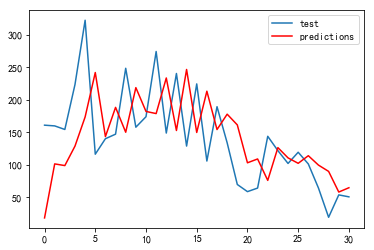

In [10]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

X = A.values

size = -30

train, test = X[0:-31], X[-31:len(X)]

history = [x for x in train]

predictions = list()

for t in range(len(test)):

    model = ARIMA(history, order=(5,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    predictions.append(yhat)

    obs = test[t]

    history.append(obs)

    print('predicted=' ,yhat,',' , 'expected=' ,obs)

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot

plt.plot(test)

plt.plot(predictions, color='red')
plt.legend(['test','predictions'])
plt.show()

#滚动预测值（红色）相比的预期值（蓝色）


In [11]:
""""
A1['实际金额'] = A1['实际金额'].diff()

from sklearn.preprocessing import Imputer

my_imputer = Imputer()
data_imputed = my_imputer.fit_transform(A1)


A1['实际金额'] = data_imputed
""""
import matplotlib.pyplot as plt

A1['实际金额'].plot()

plt.show()

#下面的示例绘制了时间序列中大量滞后的自相关。

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(A1)

plt.show()



"""
将ARIMA模型与整个Shampoo Sales数据集相匹配，并检查残差。

首先，我们适合ARIMA（5,1,0）模型。这将自动回归的滞后值设置为5，使用差值顺序1使时间序列静止，并使用0的移动平均模型。

在拟合模型时，提供了大量关于线性回归模型拟合的调试信息。我们可以通过将disp参数设置为0 来关闭它。
"""

from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from pandas import DataFrame

# fit model

model = ARIMA(A1, order=(5,1,0))

model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors残差的线图

residuals = DataFrame(model_fit.resid)

residuals.plot()

plt.show()


#残余误差值的密度图，表明误差是高斯的，但可能不是以零为中心。

residuals.plot(kind='kde')

plt.show()

#显示残差的分布。结果表明，预测中确实存在偏差（残差中的非零均值）
print(residuals.describe())

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

X = A1.values

size = -30

train, test = X[0:-31], X[-31:len(X)]

history = [x for x in train]

predictions = list()

for t in range(len(test)):

    model = ARIMA(history, order=(5,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    predictions.append(yhat)

    obs = test[t]

    history.append(obs)

    print('predicted=' ,yhat,',' , 'expected=' ,obs)

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot

plt.plot(test)

plt.plot(predictions, color='red')
plt.legend(['test','predictions'])
plt.show()

#滚动预测值（红色）相比的预期值（蓝色）


SyntaxError: EOL while scanning string literal (<ipython-input-11-9f793887a4b0>, line 11)